# Финальный проект

Задача проекта – проанализировать ассортимент товаров. Определить какие товары входят в основной и дополнительный ассортимент, чтобы грамотно предлагать покупателям дополнительные товары и оптимизировать закупки.

## Материалы
1. [Презентация](https://yadi.sk/i/m4DIfVpatGX-0g)
2. [Дашборд](https://public.tableau.com/app/profile/tatiana6884/viz/13___16226384408980/Dashboard1)

### Шаг 1. Загрузить и изучить данные.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')
!pip install plotly

from pymystem3 import Mystem
m = Mystem() 
from collections import Counter

import plotly.express as px
import numpy as np

import datetime

from scipy import stats as st
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

from io import BytesIO
import requests

# Сброс ограничений на количество символов в строке
pd.set_option('display.max_colwidth', 80)

Defaulting to user installation because normal site-packages is not writeable


Предварительно файл `ecommerce_dataset.csv` загрузили в Google таблицы. Так мы сможем встроить сторонний файл с данными в проект.

In [2]:
#импортируем файл ecommerce_dataset.csv из google таблиц
spreadsheet_id = '1-nYnwwV4Q5SXho8KJjfsbRNgF-pvYsSfTuLFIiVECmI'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
6732,2019103111,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж), 1404094",1,404.0
6733,2019103112,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019103113,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,"Герань домашняя (пеларгония зональная) цветущая D12, H25-30, малиновая с кра...",1,157.0
6735,2019103114,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
date           6737 non-null int64
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


In [4]:
df.describe()

,date,order_id,quantity,price
count,6.737000e+03,6737.000000,6737.000000,6737.000000
mean,2.018855e+09,43128.948345,2.501559,462.028499
std,3.855185e+05,27899.414662,15.266478,871.296064
min,2.018100e+09,12624.000000,1.000000,9.000000
25%,2.019020e+09,14827.000000,1.000000,101.000000
50%,2.019050e+09,68503.000000,1.000000,135.000000
75%,2.019061e+09,70504.000000,1.000000,398.000000
max,2.019103e+09,73164.000000,1000.000000,14917.000000


In [5]:
df.duplicated().sum()

0

**Промежуточный вывод:**

В датасете хранится информация о заказах покупателей: дата покупки, id покупателя, номер заказа, продукт, его количество и цена за единицу товара. Всего в датасете представлено 6786 заказов, пропусков и дубликатов нет. Столбец `date` нужно перевести в формат даты, по форматам остальных столбцов все нормально.

Видно, что большинство покупателей (75%) приобретают 1 товар. Судя по всему имеются розничные продажи, например, 1000 единиц товара за 1 заказ. 
______

### Шаг 2. Предобработка данных.

In [6]:
#меняем столбец date в нужный тип
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d%H')
df.head(10)

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.0
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674.0


In [7]:
#изменим название столбца date в datetime
df = df.rename(columns = {'date':'datetime'})
df.head(10)

,datetime,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.0
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674.0


In [8]:
#создадим столбцы с отдельно датой, годом, месяцем, днем недели и временем суток заказа
df['date'] = df['datetime'].dt.date
df['year'] = df['datetime'].dt.year
df['month_year'] = df['datetime'].dt.to_period('M')
df['month_name'] = df['datetime'].dt.month_name()
df['day'] = df['datetime'].dt.day
df['weekday'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

df.tail(10)

,datetime,customer_id,order_id,product,quantity,price,date,year,month_year,month_name,day,weekday,hour
6727,2019-10-30 21:00:00,b24b3075-bbb5-498c-add9-534a727f3c33,73151,"Герань домашняя (пеларгония зональная) цветущая D12, H25-30, сиреневый, простая",2,157.0,2019-10-30,2019,2019-10,October,30,Wednesday,21
6728,2019-10-31 00:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0,2019-10-31,2019,2019-10,October,31,Thursday,0
6729,2019-10-31 02:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0,2019-10-31,2019,2019-10,October,31,Thursday,2
6730,2019-10-31 09:00:00,6ddd4081-515e-401a-9567-8c0eab6dc868,73154,Литопс Микс d-5 см,1,112.0,2019-10-31,2019,2019-10,October,31,Thursday,9
6731,2019-10-31 11:00:00,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,Мимоза стыдливая d-9 см,1,329.0,2019-10-31,2019,2019-10,October,31,Thursday,11
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж), 1404094",1,404.0,2019-10-31,2019,2019-10,October,31,Thursday,11
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,2019-10-31,2019,2019-10,October,31,Thursday,12
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,"Герань домашняя (пеларгония зональная) цветущая D12, H25-30, малиновая с кра...",1,157.0,2019-10-31,2019,2019-10,October,31,Thursday,13
6735,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0,2019-10-31,2019,2019-10,October,31,Thursday,14
6736,2019-10-31 16:00:00,344aa778-e436-419e-a9c6-9b8f37b7c1df,73137,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,2019-10-31,2019,2019-10,October,31,Thursday,16


In [9]:
print(f"Самая ранняя дата заказа: {df['date'].min()}; последняя дата заказа: {df['date'].max()}.")
print(f"В датасете представлены данные за {(df['date'].max() - df['date'].min()).days} дней.")

Самая ранняя дата заказа: 2018-10-01; последняя дата заказа: 2019-10-31.
В датасете представлены данные за 395 дней.


In [10]:
#приведем значения столбца product к нижнему регистру
df['product'] = df['product'].str.lower()
df.head(10)

,datetime,customer_id,order_id,product,quantity,price,date,year,month_year,month_name,day,weekday,hour
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-01,2018,2018-10,October,1,Monday,0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0,2018-10-01,2018,2018-10,October,1,Monday,0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018,2018-10,October,1,Monday,0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10-01,2018,2018-10,October,1,Monday,0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10-01,2018,2018-10,October,1,Monday,0
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,шеффлера лузеана d-9 см,1,164.0,2018-10-01,2018,2018-10,October,1,Monday,0
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,юкка нитчатая d-12 см h-25-35 см,1,134.0,2018-10-01,2018,2018-10,October,1,Monday,0
7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,настенная сушилка для белья gimi brio super 100,1,824.0,2018-10-01,2018,2018-10,October,1,Monday,8
8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"таз пластмассовый 21,0 л круглый ""водолей"" с614, 1404056",1,269.0,2018-10-01,2018,2018-10,October,1,Monday,8
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,чехол для гладильной доски colombo persia beige 130х50 см из хлопка 5379,1,674.0,2018-10-01,2018,2018-10,October,1,Monday,9


**Промежуточный вывод:**

В целом выгрузка хорошая – пропусков и дубликатов нет, столбцы названы корректно. Единственное, что пришлось сделать, это перевести столбец `date` в формат даты и времени и привести названия продуктов в нижний регистр.

Всего в датасете представлены данные с 1 октября 2018 по 31 октября 2019 года – 395 дней. Добавили по каждому заказу отдельно только дату, год, месяц, день месяца, день недели и час заказа.
_________

### Шаг 3. Исследовательский анализ данных (EDA).

In [11]:
#посчитаем выручку по каждому продукту
df['revenue'] = df['quantity'] * df['price']
df.head()

,datetime,customer_id,order_id,product,quantity,price,date,year,month_year,month_name,day,weekday,hour,revenue
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-01,2018,2018-10,October,1,Monday,0,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0,2018-10-01,2018,2018-10,October,1,Monday,0,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018,2018-10,October,1,Monday,0,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10-01,2018,2018-10,October,1,Monday,0,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10-01,2018,2018-10,October,1,Monday,0,112.0


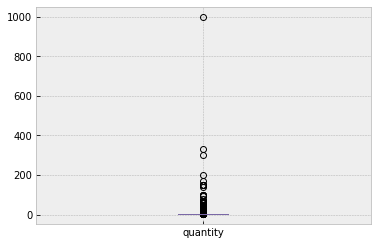

In [12]:
df.boxplot(column=['quantity'])

In [13]:
df[df['quantity'] == 1000]

,datetime,customer_id,order_id,product,quantity,price,date,year,month_year,month_name,day,weekday,hour,revenue
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, burstenmann, 0522/0000",1000,675.0,2019-06-18,2019,2019-06,June,18,Tuesday,15,675000.0


Похоже на выброс или какую-то ошибку. Даже если предположить, что вантузы покупали оптом, как-то очень уж очень много получается. Такой крупный заказ всего один, поэтому его можно убрать.

In [14]:
df = df.query("quantity != 1000")
df['quantity'].max()

334

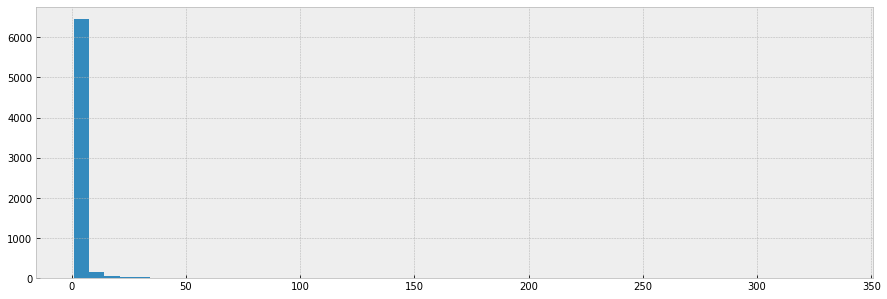

In [15]:
df['quantity'].hist(bins=50, figsize=(15,5))

In [16]:
df.query("quantity >= 40").count()

datetime       42
customer_id    42
order_id       42
product        42
quantity       42
price          42
date           42
year           42
month_year     42
month_name     42
day            42
weekday        42
hour           42
revenue        42
dtype: int64

In [17]:
#разделим заказы на оптовые и розничные
def orders(row):
    quantity = row['quantity']
    if quantity >= 40:
        return 'оптовый'
    else:
        return 'розничный'
    
df['order_category'] = df.apply(orders, axis=1)

In [18]:
#для дальнейшего рассмотрения убрали оптовые заказы
df = df.query("order_category == 'розничный'").copy()

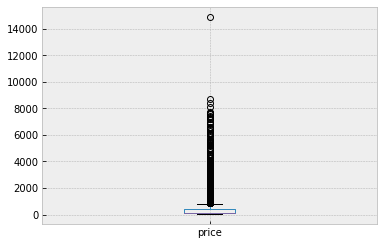

In [19]:
df.boxplot(column=['price'])

In [20]:
df[df['price'] == df['price'].max()]

,datetime,customer_id,order_id,product,quantity,price,date,year,month_year,month_name,day,weekday,hour,revenue,order_category
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,сушилка уличная leifheit 85210 linomatic v 400 40 м 175х237х237 см зеленая,1,14917.0,2019-07-29,2019,2019-07,July,29,Monday,17,14917.0,розничный


Гугл говорит, что эта сушилка примерно столько и стоит (а где-то даже и еще дороже). Так что это точно не выброс и не ошибка. Оставляем, как есть.

**Распределение продаж по сезону**

In [21]:
df.groupby(['customer_id', 'order_id', 'product']).count().sort_values('date', ascending=False).head()

datetime  \
customer_id                          order_id product                                                                          
1d6c8c1f-a799-4418-9af2-1ded47d7a85c 14833    тагетис крупноцветковый рассада однолетних цветов в кассете по 10 шт        74   
                                              рассада патиссона сорт диск, кассета по 6шт                                 74   
                                              рассада кабачка сорт аэронавт, кассета по 6шт                               74   
                                              рассада кабачка сорт белогор кассета 6 шт e6                                74   
                                              рассада кабачка сорт горный, кассета по 6шт                                 74   

                                                                                                                    quantity  \
customer_id                          order_id product                                                                          
1d6c8c1f-a799-4418-9af2-1ded47d7a85c 14833    тагетис крупноцветковый рассада однолетних цветов в кассете по 10 шт        74   
                                              рассада патиссона сорт диск, кассета по 6шт                                 74   
                                              рассада кабачка сорт аэронавт, кассета по 6шт                               74   
                                              рассада кабачка сорт белогор кассета 6 шт e6                                74   
                                              рассада кабачка сорт горный, кассета по 6шт                                 74   

                                                                                                                    price  \
customer_id                          order_id product                                                                       
1d6c8c1f-a799-4418-9af2-1ded47d7a85c 14833    тагетис крупноцветковый рассада однолетних цветов в кассете по 10 шт     74   
                                              рассада патиссона сорт диск, кассета по 6шт                              74   
                                              рассада кабачка сорт аэронавт, кассета по 6шт                            74   
                                              рассада кабачка сорт белогор кассета 6 шт e6                             74   
                                              рассада кабачка сорт горный, кассета по 6шт                              74   

                                                                                                                    date  \
customer_id                          order_id product                                                                      
1d6c8c1f-a799-4418-9af2-1ded47d7a85c 14833    тагетис крупноцветковый рассада однолетних цветов в кассете по 10 шт    74   
                                              рассада патиссона сорт диск, кассета по 6шт                             74   
                                              рассада кабачка сорт аэронавт, кассета по 6шт                           74   
                                              рассада кабачка сорт белогор кассета 6 шт e6                            74   
                                              рассада кабачка сорт горный, кассета по 6шт                             74   

                                                                                                                    year  \
customer_id                          order_id product                                                                      
1d6c8c1f-a799-4418-9af2-1ded47d7a85c 14833    тагетис крупноцветковый рассада однолетних цветов в кассете по 10 шт    74   
                                              рассада патиссона сорт диск, кассета по 6шт                             74   
                                              рассада кабачка сорт аэронавт, касс

In [22]:
#посмотрим, сколько будет дубликатов, если убрать все, что связано с датой
df_0 = df[['customer_id', 'order_id', 'product', 'quantity', 'price']]
df_0.duplicated().sum()

1860

In [23]:
#получим перечень дубликатов (все, кроме самого первого)
df_0 = df_0[df_0.duplicated(keep='first')]
df_0

#сохраним список индексов дубликатов, чтобы убрать их в основном датасете
indexes = df_0.index.tolist()

#уберем дубликаты из основного датасета
df = df.query("index not in @indexes")

In [24]:
#сделаем сводную таблицу по месяцам и посмотрим на выручку, количество проданного товара и количество заказов
df_summary = df.groupby(['month_name', 'year']).agg({'revenue': 'sum', 'quantity': 'sum', 'order_id': 'nunique'}).reset_index()
df_summary

,month_name,year,revenue,quantity,order_id
0,April,2019,302935.0,1341,265
1,August,2019,172443.0,370,174
2,December,2018,313566.0,630,280
3,February,2019,302955.0,882,287
4,January,2019,216321.0,420,164
5,July,2019,235410.0,561,198
6,June,2019,180318.0,570,160
7,March,2019,252101.0,886,246
8,May,2019,225535.0,1183,182
9,November,2018,313170.0,868,202


In [25]:
print(f"Количество уникальных товаров: {len(df['product'].unique())} шт.")
print(f"Общее количество проданных товаров: {df['quantity'].sum()} шт.")
print(f"Количество уникальных пользователей: {len(df['customer_id'].unique())} клиентов")
print(f"Количество заказов: {len(df['order_id'].unique())} шт.")
print(f"Общая выручка за период: {df['revenue'].sum()} у.е.")

Количество уникальных товаров: 2322 шт.
Общее количество проданных товаров: 9430 шт.
Количество уникальных пользователей: 2420 клиентов
Количество заказов: 2751 шт.
Общая выручка за период: 3215179.0 у.е.


In [26]:
print(f"Среднее количество заказов в месяц: {df_summary['order_id'].mean().round(2)} шт.")

Среднее количество заказов в месяц: 212.69 шт.


In [27]:
#присмовим каждому месяцу соответствующее время года
def season(row):
    month = row['month_name']
    if month == 'December' or month == 'January' or month == 'February':
        return 'Winter'
    if month == 'March' or month == 'April' or month == 'May':
        return 'Spring'
    if month == 'June' or month == 'July' or month == 'August':
        return 'Summer'
    if month == 'September' or month == 'October' or month == 'November':
        return 'Autumn'

In [28]:
df_summary['season'] = df_summary.apply(season, axis=1)
df_summary

,month_name,year,revenue,quantity,order_id,season
0,April,2019,302935.0,1341,265,Spring
1,August,2019,172443.0,370,174,Summer
2,December,2018,313566.0,630,280,Winter
3,February,2019,302955.0,882,287,Winter
4,January,2019,216321.0,420,164,Winter
5,July,2019,235410.0,561,198,Summer
6,June,2019,180318.0,570,160,Summer
7,March,2019,252101.0,886,246,Spring
8,May,2019,225535.0,1183,182,Spring
9,November,2018,313170.0,868,202,Autumn


In [29]:
df['season'] = df.apply(season, axis=1)
df.head(5)

,datetime,customer_id,order_id,product,quantity,price,date,year,month_year,month_name,day,weekday,hour,revenue,order_category,season
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-01,2018,2018-10,October,1,Monday,0,142.0,розничный,Autumn
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0,2018-10-01,2018,2018-10,October,1,Monday,0,194.0,розничный,Autumn
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018,2018-10,October,1,Monday,0,112.0,розничный,Autumn
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10-01,2018,2018-10,October,1,Monday,0,179.0,розничный,Autumn
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10-01,2018,2018-10,October,1,Monday,0,112.0,розничный,Autumn


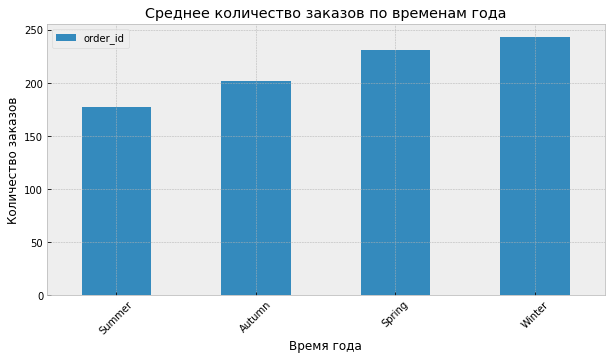

In [30]:
#График количества заказов по временам года
temp = df_summary.groupby('season').agg({'order_id': 'mean'}).reset_index()
ax = temp[['season', 'order_id']].set_index('season').sort_values('order_id', ascending=True).plot(kind='bar', figsize=(10, 5))
ax.set_xlabel('Время года')
ax.set_ylabel('Количество заказов')
ax.set_title('Среднее количество заказов по временам года')
plt.xticks(rotation=45)
plt.show()

Судя по всему больше всего заказов в среднем весной и зимой. Весной закупаются товарами на лето, например, семенами и растениями, которые всходят весной, а зимой могут быть распродажи товаров или скидки. 

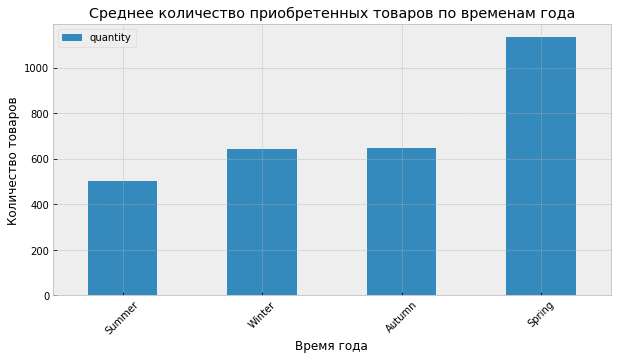

In [31]:
#График количества купленного товара по временам года
temp = df_summary.groupby('season').agg({'quantity': 'mean'}).reset_index()
ax = temp[['season', 'quantity']].set_index('season').sort_values('quantity', ascending=True).plot(kind='bar', figsize=(10, 5))
ax.set_xlabel('Время года')
ax.set_ylabel('Количество товаров')
ax.set_title('Среднее количество приобретенных товаров по временам года')
plt.xticks(rotation=45)
plt.show()

Весной приобретают большее количество штук товаров. То есть покупатели охотнее оплачивают большее количество товаров в одном заказе, чем, например, зимой. 

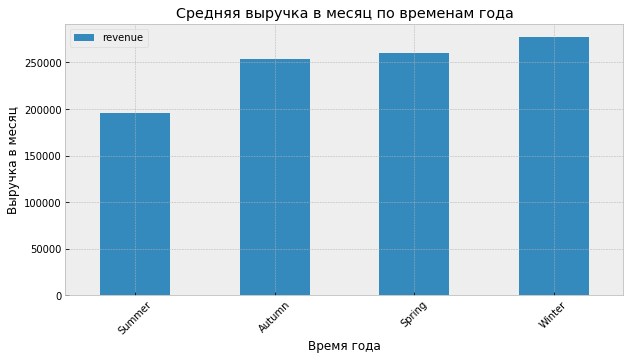

In [32]:
#График средней выручки по временам года
temp = df_summary.groupby('season').agg({'revenue': 'mean'}).reset_index()
ax = temp[['season', 'revenue']].set_index('season').sort_values('revenue', ascending=True).plot(kind='bar', figsize=(10, 5))
ax.set_xlabel('Время года')
ax.set_ylabel('Выручка в месяц')
ax.set_title('Средняя выручка в месяц по временам года')
plt.xticks(rotation=45)
plt.show()

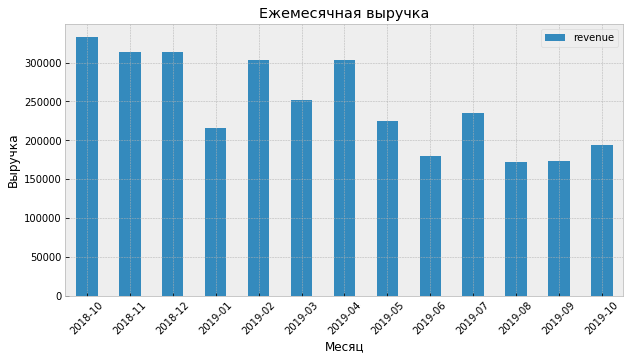

In [33]:
#График средней выручки по месяцам
temp = df.groupby('month_year').agg({'revenue': 'sum'}).reset_index()
ax = temp[['month_year', 'revenue']].set_index('month_year').plot(kind='bar', figsize=(10, 5))
ax.set_xlabel('Месяц')
ax.set_ylabel('Выручка')
ax.set_title('Ежемесячная выручка')
plt.xticks(rotation=45)
plt.show()

In [34]:
temp['revenue'].describe()

count        13.000000
mean     247321.461538
std       59363.011847
min      172443.000000
25%      194457.000000
50%      235410.000000
75%      302955.000000
max      333046.000000
Name: revenue, dtype: float64

В среднем выручка ежемесячно составляет 235 410 у.е. Зимой средняя выручка в месяц выше, чем в другое время года, при том, что покупатели делают больше заказов с меньшим количеством товаров. Так что скорее всего в этот период покупатели делают более дорогие покупки, чем в другие времена года.  

**Средний чек покупателя**

In [35]:
df_monthly = df.groupby(['month_year', 'order_id']).agg({'revenue': 'sum', 'quantity': 'sum'}).reset_index()
df_monthly

,month_year,order_id,revenue,quantity
0,2018-10,13547,684.0,3
1,2018-10,14480,359.0,3
2,2018-10,14481,600.0,4
3,2018-10,14482,376.0,2
4,2018-10,14485,676.0,4
...,...,...,...,...
2760,2019-10,73155,329.0,1
2761,2019-10,73156,404.0,1
2762,2019-10,73158,1087.0,1
2763,2019-10,73162,157.0,1


Text(0, 0.5, 'Количество заказов')

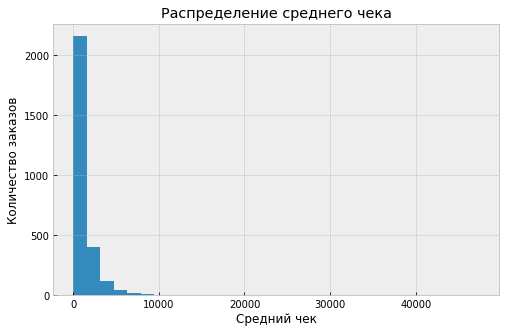

In [36]:
df_monthly['revenue'].plot(kind='hist', bins=30, figsize=(8, 5), title='Распределение среднего чека')
plt.xlabel('Средний чек')
plt.ylabel("Количество заказов")

In [37]:
df_monthly['revenue'].describe()

count     2765.000000
mean      1162.813382
std       1786.417970
min         14.000000
25%        284.000000
50%        674.000000
75%       1424.000000
max      47385.000000
Name: revenue, dtype: float64

Сумма заказа распределена неравномерно из-за большого количества крупных или оптовых заказов,  поэтому ориентируемся на медиану – 674 у.е. 

**Средний чек по месяцам**

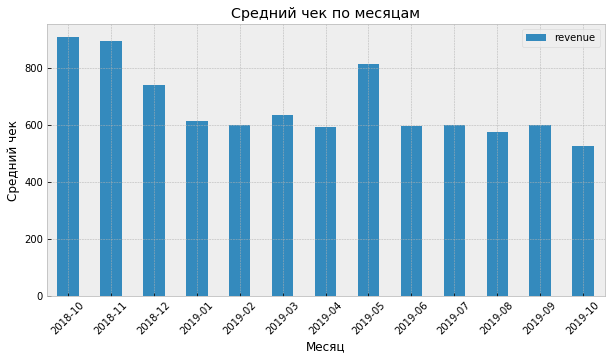

In [38]:
#График среднего чека по месяцам
temp = df_monthly.groupby('month_year').agg({'revenue': 'median'}).reset_index()
ax = temp[['month_year', 'revenue']].set_index('month_year').plot(kind='bar', figsize=(10, 5))
ax.set_xlabel('Месяц')
ax.set_ylabel('Средний чек')
ax.set_title('Средний чек по месяцам')
plt.xticks(rotation=45)
plt.show()

Пиковое значение среднего чека достигнуто в октябре 2018 года. Далее средний чек держится примерно на одном уровне – около 600 у.е. В мае 2019 года виден резкий скачок среднего чека до 800 у.е.

Text(0, 0.5, 'Количество заказов')

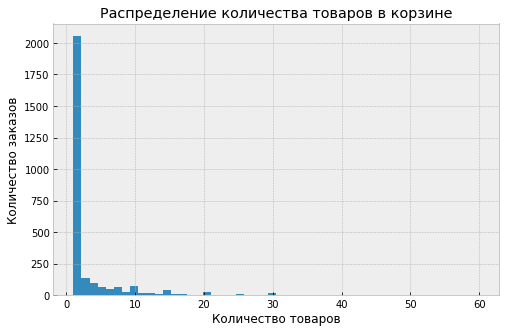

In [39]:
df_monthly['quantity'].plot(kind='hist', bins=50, figsize=(8, 5), title='Распределение количества товаров в корзине')
plt.xlabel('Количество товаров')
plt.ylabel("Количество заказов")

Количество товаров в корзине также распределено неравномерно. Поэтому также ориентируемся на медиану.

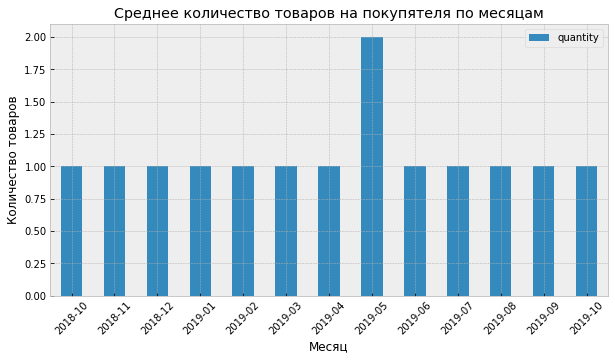

In [40]:
#График среднего количества товаров по месяцам
temp = df_monthly.groupby('month_year').agg({'quantity': 'median'}).reset_index()
ax = temp[['month_year', 'quantity']].set_index('month_year').plot(kind='bar', figsize=(10, 5))
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество товаров')
ax.set_title('Среднее количество товаров на покупятеля по месяцам')
plt.xticks(rotation=45)
plt.show()

Большее количество товаров приобрели в мае 2019 года – 3 шт. на покупателя, в апреле и июне 2019 – 2 шт. на покупателя. Все остальное время в среднем на покупателя приходится 1 товар.

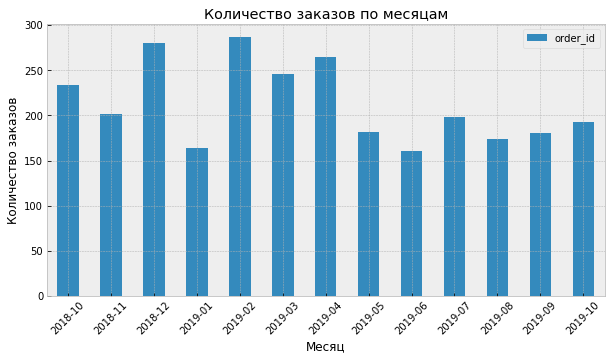

In [41]:
#График количества заказов по месяцам
temp = df_monthly.groupby('month_year').agg({'order_id': 'nunique'}).reset_index()
ax = temp[['month_year', 'order_id']].set_index('month_year').plot(kind='bar', figsize=(10, 5))
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество заказов')
ax.set_title('Количество заказов по месяцам')
plt.xticks(rotation=45)
plt.show()

**Промежуточный вывод:**

Всего за весь период было привлечено 3 215 179 у.е. выручки, продано 9,4 тысяч товаров. Заказы оформили 2420 человек. 

В данных явно есть оптовые закупки, их убрали в отдельную категорию. Также выявлен явный выброс – заказ на 1000 вантузов, для удобства убрали его из датасета. 

Самое большее количество заказов приходится на весну и зиму – на декабрь 2018, февраль и апрель 2019. Весной закупаются товарами на лето, например, семенами и растениями, которые всходят весной, а зимой могут быть распродажи товаров или скидки на более дорогие товары. 

Пиковое значение среднего чека достигнуто в октябре 2018 года. Далее средний чек держится примерно на одном уровне – около 600 у.е. В мае 2019 года виден резкий скачок среднего чека до 800 у.е.

Большее количество товаров на покупателя было в мае 2019 года – 2 шт. на покупателя. Все остальное время в среднем на покупателя приходится 1 товар. 

Судя по графикам можно сделать вывод, что в холодные времена года покупатели приобретают более дорогие товары и в меньшем количестве, а в теплое – наоборот. 
_________

### Шаг 4. Классификация товаров. Проверка статистических гипотез.

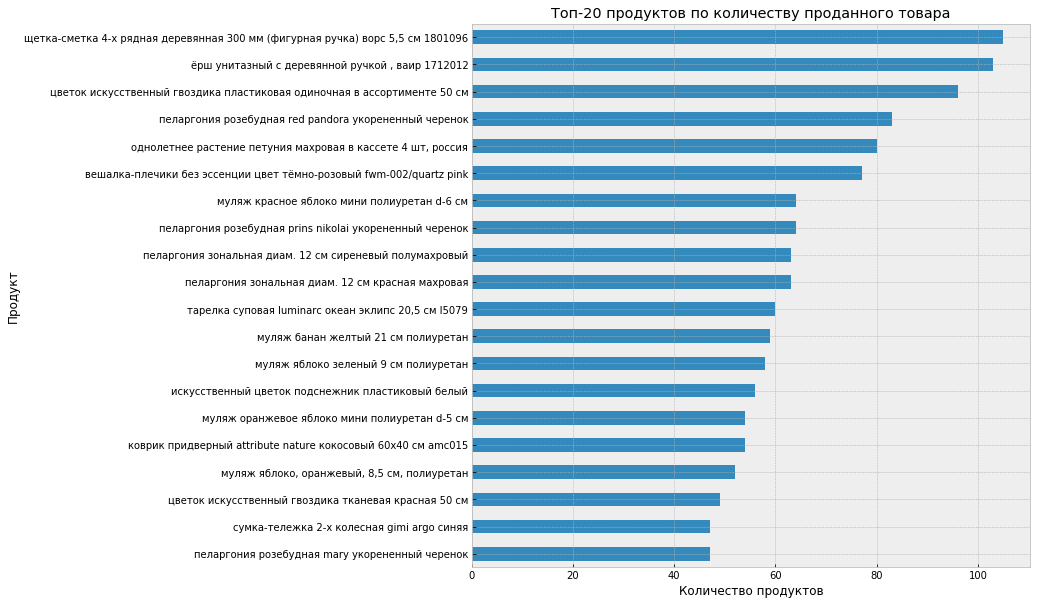

In [42]:
#График топ-20 продуктов по количеству товара в заказах
ax = df.groupby('product')['quantity'].sum().sort_values().tail(20).plot(kind='barh', figsize=(10, 10))
ax.set_xlabel('Количество продуктов')
ax.set_ylabel('Продукт')
ax.set_title('Топ-20 продуктов по количеству проданного товара')
plt.show()

In [43]:
#проведем леммизацию продуктов
product_lemma = df['product'].unique().tolist()
string = '; '.join(product_lemma)

#выведем количество повторяющихся слов и символов
lemmas = m.lemmatize(string)
Counter(lemmas).most_common()

[(' ', 15258),
 ('; ', 2317),
 ('см', 1057),
 (', ', 1056),
 ('-', 969),
 ('для', 542),
 (',', 293),
 ('в', 273),
 ('d', 259),
 ('л', 252),
 ('с', 247),
 ('рассада', 221),
 ('5', 189),
 (' (', 171),
 ('сорт', 171),
 ('кассета', 170),
 ('шт', 169),
 ('белый', 167),
 ('0', 163),
 ('12', 145),
 ('белье', 144),
 ('красный', 143),
 (') ', 139),
 ('доска', 132),
 ('/', 131),
 ('горшок', 130),
 ('9', 123),
 ('сушилка', 120),
 ('цветок', 117),
 ('объем', 114),
 ('гладильный', 113),
 ('2', 112),
 ('6', 110),
 ('тележка', 108),
 ('1', 108),
 ('по', 101),
 ('4', 101),
 ('томат', 100),
 ('10', 99),
 ('сумка', 98),
 ('. ', 97),
 ('диам', 95),
 ('помидор', 93),
 ('*', 89),
 ('№', 88),
 ('пеларгония', 86),
 ('розовый', 84),
 ('3', 82),
 ('из', 81),
 ('и', 80),
 ('luminarc', 79),
 ('хозяйственный', 77),
 ('gimi', 75),
 ('ника', 75),
 ('7', 74),
 ('среднеспелый', 73),
 ('20', 72),
 ('коврик', 72),
 ('ванный', 72),
 ('кухня', 71),
 ('зелень', 68),
 ('муляж', 68),
 ('роза', 68),
 ('черный', 67),
 ('мл', 

In [45]:
classification_dict = {
    'декор и интерьер': ['муляж',  'вешалка',  'плечик',  'крючок',  'искусственный',  'коврик',  'чехол',  'bacchetta',  'кашпо',  'плед',  'ковер',  'скатерть',  'простыня',  'декоративный',  'полотенце',  'наматрасник'], 
    'крепеж и фурнитура': ['крепеж',  'пружина',  'ручка',  'стяжка',  'стремянка',  'шпингалет',  'сварка',  'полка'],
    'растения и цветы': ['растение',  'лиана',  'герань',  'чайногибридный',  'фуксия',  'примула',  'радермахер',  'хризолидокарпус',  'шеффлер',  'юкка',  'суккулент',  'эхеверие',  'циперус',  'эвкалипт',  'адиантум',  'кампанула',  'нолина',  'хлорофитум',  'глоксиния',  'азалия',  'каландив',  'каланхое',  'роза',  'фиалка',  'лаванда',  'декабрист',  'калла',  'камнеломка',  'лавр'],
    'семена и саженцы': [ 'рассада',  'зелень',  'томат',  'помидор',  'пеларгония',  'однолетний',  'капуста',  'чеснок',  'огурец',  'смесь',  'салатник',  'тимьян',  'литопс',  'земляника',  'ромашка',  'дыня',  'бархатец',  'ясколка',  'петуния',  'розмарин',  'вербена',  'овсянница',  'бакоп',  'калибрахоа',  'базилик',  'колокольчик',  'лобелия'],
    'посуда и столовые приборы': [ 'luminarc',  'тарелка',  'webber',  'термокружок',  'термос',  'банка',  'рыбочистка',  'кружка',  'фужер',  'стакан',  'тортница',  'блюдо',  'сковорода',  'нож',  'вилка',  'ложка'],
    'хозяйственные и бытовые товары': [ 'гладильный', 'сушилка',  'тележка',  'хозяйственный',  'ванный',  'gimi',  'leifheit',  'hausmann',  'ерш',  'zalger',  'spirella',  'щетка',  'rozenbal',  'ванна',  'контейнер',  'швабра',  'корзина',  'крышка',  'таз',  'ёрш',  'противень',  'вкладыши',  'порошок',  'паста',  'салфетка',  'корыто',  'урна',  'мыло',  'отбеливатель',  'ящик',  'емкость',  'термометр',  'подрукавник'],
    'бытовая техника': ['котел',  'миксер',  'утюг',  'весы']
   
}

In [46]:
def product_category(product):
    for category, items_list in classification_dict.items():
        for item in items_list:
            if item in product:
                return category
            
    return 'другое'

In [47]:
#присвоим категории товарам 
df['category_lemma'] = df['product'].apply(product_category)

#посмотрим среднюю выручку по категориям
df.groupby('category_lemma')['revenue'].mean().round(2).reset_index()

,category_lemma,revenue
0,бытовая техника,1221.57
1,декор и интерьер,745.01
2,другое,880.53
3,крепеж и фурнитура,1732.06
4,посуда и столовые приборы,666.21
5,растения и цветы,319.60
6,семена и саженцы,164.82
7,хозяйственные и бытовые товары,1540.28


Разделили товары по категориям:
1. декор и интерьер. Сюда попали товары для декорирования помещения и товары для дома, например, муляжи фруктов, вешалки, простыни, ковры и скатерти.
2. крепеж и фурнитура. В эту категорию попали товары для ремонта, например, ручка двери, стяжка, щшпингалет, полка.
3. растения и цветы. В эту категорию входят растения в горшках, которые не нужно садить и выращивать.
4. семена и саженцы. В эту категорию входят семена растений, необходимых для выращивания на огороде или дома. 
5. посуда и столовые приборы. Сюда входит вся необходимая посуда: стаканы, вилки, ложки и ножи, тарелки, сковороды.
6. хозяйственные и бытовые товары. В этой категории находятся товары для уборки дома и товары для улицы, например, сушилка, стиральный порошок, уличная урна, термометр, подрукавник.
7. другое. Сюда попали все остальные товары, которые не удалось классифицировать. По большей части здесь много товаров, которые можно было бы отнести к растениям и семенам, но в названии товаров есть много специфичных названий растений, поэтому нужно уже вручную смотреть каждый товар и добавлять в соответствующую категория. 

Если предположить, что на основной товар тратят больше денег, чем на дополнительный, то можно посмотреть по категориям, что еще приобретали покупатели. 

In [48]:
#выгрузка датасета для дашборда
#df.to_csv('df_1.csv', index = False, sep =';', encoding='utf-8') 

In [49]:
#создадим сводную таблицу по тому, сколько денег потратили на каждую категорию по заказам
df_categories = df.pivot_table(index = 'order_id', columns = 'category_lemma', values='revenue', aggfunc = 'sum')

#заменим NaN на нули
df_categories = df_categories.fillna(0)
df_categories

category_lemma,бытовая техника,декор и интерьер,другое,крепеж и фурнитура,посуда и столовые приборы,растения и цветы,семена и саженцы,хозяйственные и бытовые товары
order_id,,,,,,,,
12624,0.0,0.0,375.0,0.0,0.0,0.0,0.0,0.0
13547,0.0,0.0,0.0,0.0,0.0,0.0,684.0,0.0
14480,0.0,0.0,0.0,0.0,0.0,89.0,270.0,0.0
14481,0.0,0.0,0.0,0.0,0.0,0.0,600.0,0.0
14482,0.0,0.0,0.0,0.0,0.0,0.0,376.0,0.0
...,...,...,...,...,...,...,...,...
73155,0.0,0.0,329.0,0.0,0.0,0.0,0.0,0.0
73156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404.0
73158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1087.0


In [50]:
#посмотрим, что еще покупают вместе с бытовой техникой
df_categories.sort_values(by='бытовая техника', ascending=False).head(15)

category_lemma,бытовая техника,декор и интерьер,другое,крепеж и фурнитура,посуда и столовые приборы,растения и цветы,семена и саженцы,хозяйственные и бытовые товары
order_id,,,,,,,,
68508,2924.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69230,2849.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70542,1918.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70045,1424.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71225,1274.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72134,1274.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68805,1199.0,487.0,0.0,0.0,0.0,0.0,0.0,0.0
68639,1049.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70550,922.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Судя по всему покупатели, если берут бытовую технику, то ничего дополнительного  больше не покупают.

In [51]:
#посмотрим, что еще покупают вместе с товарами для декора и интерьера 
df_categories.sort_values(by='декор и интерьер', ascending=False).head(15)

category_lemma,бытовая техника,декор и интерьер,другое,крепеж и фурнитура,посуда и столовые приборы,растения и цветы,семена и саженцы,хозяйственные и бытовые товары
order_id,,,,,,,,
71206,0.0,15680.0,0.0,0.0,0.0,0.0,0.0,0.0
71598,0.0,11400.0,0.0,0.0,0.0,0.0,0.0,0.0
14735,0.0,10656.0,0.0,0.0,0.0,0.0,0.0,0.0
68760,0.0,9096.0,5874.0,0.0,0.0,0.0,0.0,7086.0
71685,0.0,8832.0,0.0,0.0,0.0,0.0,0.0,0.0
71957,0.0,7870.0,0.0,0.0,0.0,0.0,0.0,0.0
68908,0.0,7722.0,0.0,0.0,0.0,0.0,0.0,0.0
72674,0.0,7496.0,0.0,0.0,0.0,0.0,0.0,0.0
69499,0.0,6270.0,0.0,0.0,0.0,0.0,0.0,0.0


Приобретая товары для декора и интерьера, чаще всего покупатели на них и останавливаются.

In [52]:
#посмотрим, что еще покупают вместе с крепежами и фурнитурой
df_categories.sort_values(by='крепеж и фурнитура', ascending=False).head(15)

category_lemma,бытовая техника,декор и интерьер,другое,крепеж и фурнитура,посуда и столовые приборы,растения и цветы,семена и саженцы,хозяйственные и бытовые товары
order_id,,,,,,,,
72992,0.0,0.0,0.0,7724.0,0.0,0.0,0.0,0.0
71633,0.0,0.0,0.0,5549.0,0.0,0.0,0.0,0.0
68554,0.0,0.0,0.0,4949.0,0.0,0.0,0.0,0.0
69709,0.0,0.0,0.0,4499.0,0.0,0.0,0.0,0.0
69103,0.0,0.0,0.0,3974.0,0.0,0.0,0.0,0.0
71426,0.0,0.0,0.0,3898.0,0.0,0.0,0.0,0.0
72035,0.0,0.0,0.0,3748.0,0.0,0.0,0.0,0.0
72329,0.0,0.0,0.0,3449.0,0.0,0.0,0.0,0.0
72330,0.0,0.0,0.0,3449.0,0.0,0.0,0.0,0.0


Помимо крепежей и фурнитуры покупатели редко покупают что-то дополнительно.

In [53]:
#посмотрим, что еще покупают вместе с посудой
df_categories.sort_values(by='посуда и столовые приборы', ascending=False).head(15)

category_lemma,бытовая техника,декор и интерьер,другое,крепеж и фурнитура,посуда и столовые приборы,растения и цветы,семена и саженцы,хозяйственные и бытовые товары
order_id,,,,,,,,
70009,0.0,0.0,0.0,0.0,5775.0,0.0,0.0,0.0
69156,0.0,0.0,0.0,0.0,4432.0,0.0,0.0,0.0
72771,0.0,0.0,0.0,0.0,3580.0,0.0,0.0,0.0
71399,0.0,0.0,0.0,0.0,2848.0,0.0,0.0,0.0
68930,0.0,0.0,0.0,0.0,2774.0,0.0,0.0,0.0
68886,0.0,0.0,0.0,0.0,2728.0,0.0,0.0,0.0
69743,0.0,0.0,0.0,0.0,2460.0,0.0,0.0,0.0
69608,0.0,0.0,0.0,0.0,2460.0,0.0,0.0,0.0
68544,0.0,0.0,0.0,0.0,2453.0,0.0,0.0,0.0


Вместе с посудой редко что берут, в нескольких заказах дополнительно есть крепежи и хозяйственные или бытовые товары.

In [54]:
#посмотрим, что еще покупают вместе с растениями в горшках
df_categories.sort_values(by='растения и цветы', ascending=False).head(15)

category_lemma,бытовая техника,декор и интерьер,другое,крепеж и фурнитура,посуда и столовые приборы,растения и цветы,семена и саженцы,хозяйственные и бытовые товары
order_id,,,,,,,,
72140,0.0,0.0,0.0,0.0,0.0,7679.0,0.0,0.0
71514,0.0,0.0,0.0,0.0,0.0,3925.0,0.0,0.0
69835,0.0,0.0,0.0,0.0,0.0,2800.0,0.0,0.0
14848,0.0,0.0,1070.0,0.0,0.0,2541.0,359.0,0.0
14903,0.0,0.0,0.0,0.0,0.0,2460.0,0.0,0.0
14696,0.0,0.0,0.0,0.0,0.0,2050.0,0.0,0.0
69101,0.0,22.0,0.0,0.0,0.0,1867.0,277.0,0.0
69877,0.0,0.0,0.0,0.0,0.0,1794.0,0.0,0.0
71615,0.0,0.0,0.0,0.0,0.0,1762.0,0.0,0.0


Вместе с растениями и цветами в горшках редко берут дополнительно семена/саженцы и что-то из декора

In [55]:
#посмотрим, что еще покупают вместе с семенами и саженцами
df_categories.sort_values(by='семена и саженцы', ascending=False).head(15)

category_lemma,бытовая техника,декор и интерьер,другое,крепеж и фурнитура,посуда и столовые приборы,растения и цветы,семена и саженцы,хозяйственные и бытовые товары
order_id,,,,,,,,
71209,0.0,0.0,0.0,0.0,0.0,0.0,7229.0,0.0
14833,0.0,0.0,0.0,0.0,0.0,0.0,4590.0,0.0
14827,0.0,0.0,0.0,0.0,0.0,0.0,4187.0,0.0
14668,0.0,0.0,0.0,0.0,0.0,139.0,4164.0,0.0
14841,0.0,0.0,0.0,0.0,0.0,0.0,3620.0,0.0
14835,0.0,0.0,210.0,0.0,0.0,0.0,3170.0,0.0
14764,0.0,0.0,0.0,0.0,0.0,246.0,3142.0,0.0
14705,0.0,488.0,0.0,0.0,0.0,410.0,2878.0,0.0
14663,0.0,0.0,0.0,0.0,0.0,0.0,2824.0,0.0


Покупая семена и саженцы иногда берут растения в горшках и что-нибудь для декора. 

In [56]:
#посмотрим, что еще покупают вместе с хоз. и бытовыми товарами
df_categories.sort_values(by='хозяйственные и бытовые товары', ascending=False).head(15)

category_lemma,бытовая техника,декор и интерьер,другое,крепеж и фурнитура,посуда и столовые приборы,растения и цветы,семена и саженцы,хозяйственные и бытовые товары
order_id,,,,,,,,
68878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24370.0
70080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16536.0
72139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14917.0
70135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11000.0
68727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9010.0
68529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8758.0
71035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8737.0
70423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8437.0
69531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8278.0


Особо что-то к хоз. и бытовым товарам ничего не берут. Кто-то в дополнение накупил товаров для декора и интерьера.

In [57]:
#посмотрим, что еще покупают вместе с нераспределенной категорией
df_categories.sort_values(by='другое', ascending=False).head(15)

category_lemma,бытовая техника,декор и интерьер,другое,крепеж и фурнитура,посуда и столовые приборы,растения и цветы,семена и саженцы,хозяйственные и бытовые товары
order_id,,,,,,,,
69830,0.0,0.0,47385.0,0.0,0.0,0.0,0.0,0.0
71205,0.0,0.0,14196.0,0.0,0.0,0.0,0.0,0.0
72162,0.0,0.0,8810.0,0.0,0.0,0.0,0.0,0.0
68571,0.0,0.0,7474.0,0.0,0.0,0.0,0.0,0.0
71687,0.0,0.0,6614.0,0.0,0.0,0.0,0.0,0.0
72020,0.0,0.0,6148.0,0.0,0.0,0.0,0.0,0.0
69236,0.0,0.0,6134.0,0.0,0.0,0.0,0.0,0.0
68895,0.0,0.0,5970.0,0.0,0.0,0.0,0.0,0.0
68760,0.0,9096.0,5874.0,0.0,0.0,0.0,0.0,7086.0


Приобретая товары, непопавшие в категории выше, тоже ничего не берут, редко приобратают дополнительно семена и саженцы.

Судя по всему у нас очень осознанные покупатели, которые покупают только то, что нужно, независимо от категорий. Либо им никто не предложил купить что-то еще. Попробуем посмотреть, что покупают по сезонам, чтобы предположить, что можно было бы им предложить.

In [58]:
#построим сводную таблицу по времени года и категориям, в которую попали товары
df_seasons = df.pivot_table(index = 'season', columns = 'category_lemma', values='order_id', aggfunc = 'count')
df_seasons

category_lemma,бытовая техника,декор и интерьер,другое,крепеж и фурнитура,посуда и столовые приборы,растения и цветы,семена и саженцы,хозяйственные и бытовые товары
season,,,,,,,,
Autumn,3,276,234,28,85,182,193,330
Spring,4,116,201,12,31,160,1139,163
Summer,2,98,142,12,18,102,272,173
Winter,5,154,201,15,72,68,147,196


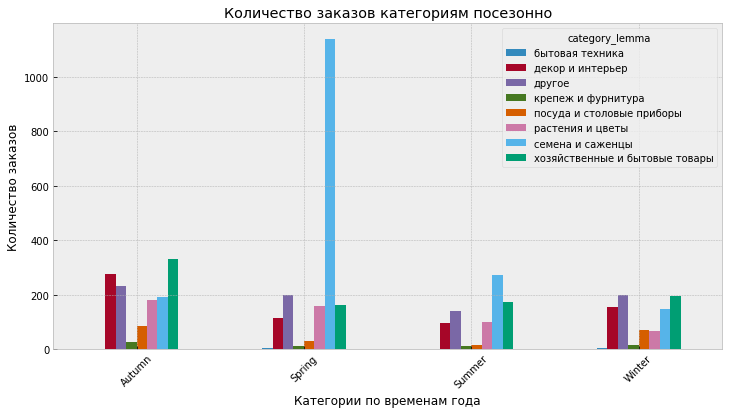

In [59]:
#построим график количества заказов по категориям в каждый сезон
ax = df_seasons.plot(kind='bar', figsize=(12, 6))
ax.set_xlabel('Категории по временам года')
ax.set_ylabel('Количество заказов')
ax.set_title('Количество заказов категориям посезонно')
plt.xticks(rotation=45)
plt.show()

Осенью по большей части приобретают хозяйственные и бытовые товары, а также товары для декора. В этот же период чаще всего покупают растения в горшках, товары для ремонта и посуду, чем в другие времена года

Весной больше всего покупают больше всего семян и саженцев, чуть меньше растений в горшках, чем осенью.

Летом покупатели приобретают семена и саженце, хозяйственные и бытовые товары, почти не приобретают посуду и товары для ремонта.

Зимой чаще покупают хозяйственные и бытовые товары, декор, меньше всего крепежей и фурнитуру и растений в горшках.

Бытовую технику в принципе покупают нечасто, но в основном весной и зимой. 

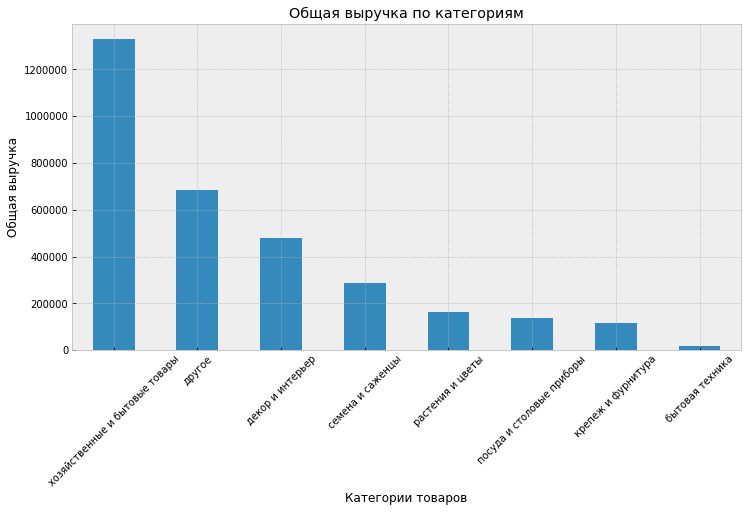

In [60]:
#посмотрим сколько в общем приходит выручки по категориям
ax = df.groupby('category_lemma')['revenue'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
ax.set_xlabel('Категории товаров')
ax.set_ylabel('Общая выручка')
ax.set_title('Общая выручка по категориям')
plt.xticks(rotation=45)
plt.show()

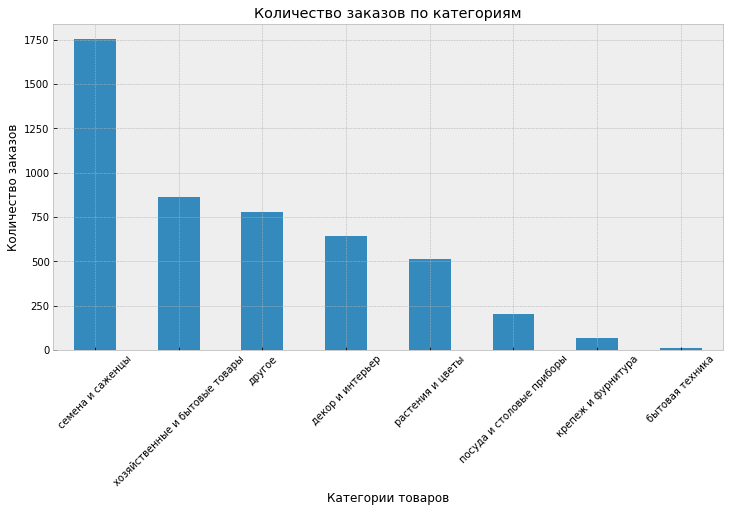

In [61]:
#посмотрим количество заказов по категориям
ax = df.groupby('category_lemma')['order_id'].count().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
ax.set_xlabel('Категории товаров')
ax.set_ylabel('Количество заказов')
ax.set_title('Количество заказов по категориям')
plt.xticks(rotation=45)
plt.show()

Больше всего приходит денег с хозяйственных и бытовых товаров, декора и семян. На эти же категории приходится больше всего заказов.

Посмотрим, отличается ли средний чек покупателей в будние и в выходные дни.

In [62]:
df.head(5)

,datetime,customer_id,order_id,product,quantity,price,date,year,month_year,month_name,day,weekday,hour,revenue,order_category,season,category_lemma
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-01,2018,2018-10,October,1,Monday,0,142.0,розничный,Autumn,растения и цветы
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0,2018-10-01,2018,2018-10,October,1,Monday,0,194.0,розничный,Autumn,растения и цветы
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018,2018-10,October,1,Monday,0,112.0,розничный,Autumn,растения и цветы
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10-01,2018,2018-10,October,1,Monday,0,179.0,розничный,Autumn,растения и цветы
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10-01,2018,2018-10,October,1,Monday,0,112.0,розничный,Autumn,растения и цветы


In [63]:
#присмовим каждому заказу бинарное значение: будний (0) или выходной день (1)
def weekend(row):
    weekday = row['weekday']
    if weekday == 'Monday' or weekday == 'Tuesday' or weekday == 'Wednesday' or weekday == 'Thursday' or weekday == 'Friday':
        return 0
    if weekday == 'Saturday' or weekday == 'Sunday':
        return 1
    
df['weekend'] = df.apply(weekend, axis=1)

In [64]:
#df_weekdays = df.groupby('weekday')['revenue'].mean().reset_index()
df_weekdays = df.groupby('weekday').agg({'revenue': 'mean', 'quantity': 'mean'}).reset_index()
df_weekdays

,weekday,revenue,quantity
0,Friday,731.347687,1.866029
1,Monday,625.537209,2.013953
2,Saturday,543.476695,1.565678
3,Sunday,622.124361,1.930153
4,Thursday,632.547558,2.088689
5,Tuesday,753.352572,2.127980
6,Wednesday,707.447405,1.872370


In [65]:
#создадим список дней недели, чтобы на графике они отображались по порядку
weekday_order = ['Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday'
 ]

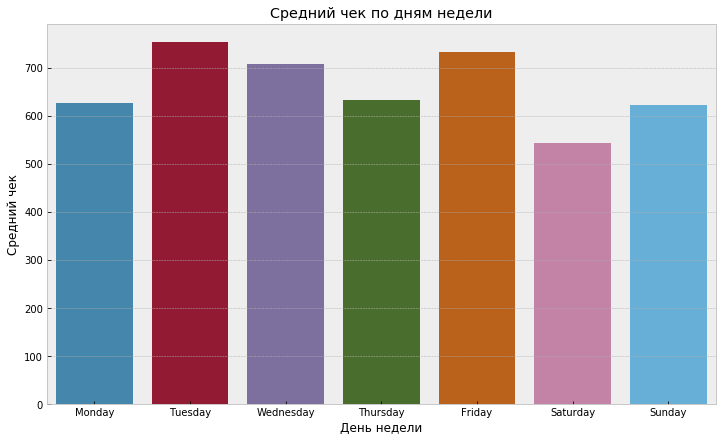

In [66]:
#построим график среднего чека по дням недели
plt.figure(figsize=(12,7))
sns.barplot(x = 'weekday', y = 'revenue', order = weekday_order, data = df_weekdays)
plt.xlabel('День недели')
plt.ylabel('Средний чек')
plt.title('Средний чек по дням недели')

plt.show()

На графике видно, что самый высокий средний чек во вторник, в среду и пятницу. В выходные средний чек значительно ниже. В субботу средний чек самый низкий, а в воскресенье на уровне понедельника – самого низкого среднего чека по будням.

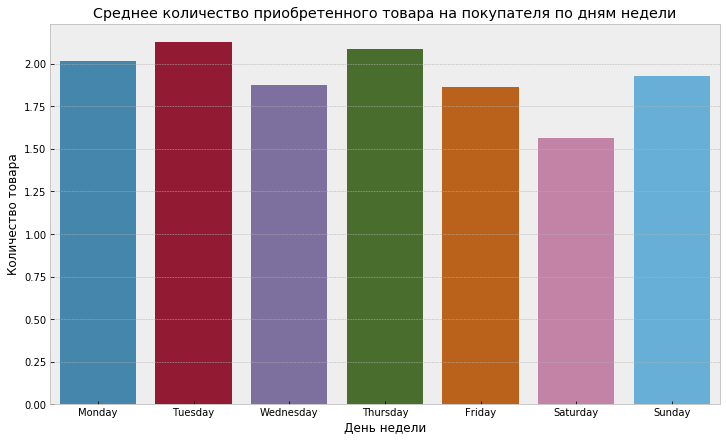

In [67]:
#построим график количества покупок по дням недели

plt.figure(figsize=(12,7))
sns.barplot(x = 'weekday', y = 'quantity', order = weekday_order, data = df_weekdays)
plt.xlabel('День недели')
plt.ylabel('Количество товара')
plt.title('Среднее количество приобретенного товара на покупателя по дням недели')

plt.show()

Больше всего товаров покупают в вторник и четверг – чуть больше 2 товаров на покупателя. В субботу приобретают самое меньшее количество товара.

In [68]:
#посмотрим в общем на средний чек и количество купленных товаров в будние и выходные дни
df_weekend = df.groupby('weekend').agg({'revenue': 'mean', 'quantity': 'mean'}).reset_index()
df_weekend = df_weekend.rename(columns={'revenue':'avg_check', 'quantity':'avg_count', 'order_id':'orders'})
df_weekend.round(2)

,weekend,avg_check,avg_count
0,0,687.01,2.00
1,1,587.07,1.77


В общем в будние дни и средний чек, и количество купленных товаров выше, чем в выходные. 

**Проверим гипотезу, что средний чек в будние дни равен среднему чеку в выходные.**

In [69]:
#Воспользуемся критерием Манна-Уитни
#H0: Средний чек по будням равен среднему чеку в выходные
#H1: Средний чек по будням не равен среднему чеку в выходные

alpha = 0.05
results = st.mannwhitneyu(df[df['weekend']== 0]['revenue'], df[df['weekend']== 1]['revenue'], True, 'two-sided')
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение:  0.011957591140271442
Отвергаем нулевую гипотезу: разница статистически значима


In [70]:
#Относительное изменение среднего чека в выходные по отношению к среднему чеку в будние дни

relative_avg_check = (df[df['weekend']== 1]['revenue'].mean()/df[df['weekend']== 0]['revenue'].mean()-1).round(3)
print(f"Относительное изменение среднего чека по выходным по отношению к среднему чеку по будням составляет {relative_avg_check}")

Относительное изменение среднего чека по выходным по отношению к среднему чеку по будням составляет -0.145


Относительное изменение среднего чека по выходным по отношению к будням составляет -0.145. Статистическая значимость равняется 0.12, разница между средними чеками оказалась статистически значимой.

**Промежуточный вывод:**

Разделили товары по категориям:

   1. `декор и интерьер`. Сюда попали товары для декорирования помещения и товары для дома, например, муляжи фруктов, вешалки, простыни, ковры и скатерти. Товары для декора и интерьера покупают чаще всего осенью и зимой.
   2. `крепеж и фурнитура`. В эту категорию попали товары для ремонта, например, ручка двери, стяжка, щшпингалет, полка. Крепежи и фурнитуру чаще всего покупают осенью.
   3. `растения и цветы`. В эту категорию входят растения в горшках, которые не нужно садить и выращивать. Чаще всего растения покупают осенью и весной.
   4. `семена и саженцы`. В эту категорию входят семена растений, необходимых для выращивания на огороде или дома. Чаще всего семена и саженцы покупают весной и летом. 
   5. `посуда и столовые приборы`. Сюда входит вся необходимая посуда: стаканы, вилки, ложки и ножи, тарелки, сковороды. Посуду чаще всего приобретают осенью и зимой.
   6. `хозяйственные и бытовые товары`. В этой категории находятся товары для уборки дома и товары для улицы, например, сушилка, стиральный порошок, уличная урна, термометр, подрукавник. В целом хоз. и бытовые товары нужны круглогодично, но больше всего их закупают осенью.
   7. `бытовая техника`. В эту категорию попали утюги, миксеры и пр. Бытовую технику в принципе покупают нечасто, но в основном весной и зимой.
   8. `другое`. Сюда попали все остальные товары, которые не удалось классифицировать. По большей части здесь много товаров, которые можно было бы отнести к растениям и семенам, но в названии товаров есть много специфичных названий растений, поэтому нужно уже вручную смотреть каждый товар и добавлять в соответствующую категория. Чаще всего приобретают товары из этой категории осенью, весной и зимой. 

В основном покупатели покупают только те товары, за которыми пришли, не покупая ничего дополнительно. 

Больше всего приходит денег с хозяйственных и бытовых товаров, декора и семян. На эти же категории приходится больше всего заказов, не считая нераспределенную категорию. **Можем сделать вывод, что в эти категории и входят основные товары, а в остальные – дополнительные.**

Больше всего покупатели тратят в будние дни, чем в выходные. С понедельника по пятницу выше средний чек и количество проданного товара, чем в выходные. Разница между средними чеками оказалась статистически значимой.
_________

### Шаг 5. Общий вывод.

Задача проекта – проанализировать ассортимент товаров. Определить какие товары входят в основной и дополнительный ассортимент, чтобы грамотно предлагать покупателям дополнительные товары и оптимизировать закупки.

В датасете представлена информация о заказах покупателей: дате и времени покупки, уникальный номер покупателя и заказа, наименования приобретенных товаров, их цена и количество. Все заказы были в период с 1 октября 2018 по 31 октября 2019 года. 

Мы загрузили и обработали данные: перевели дату в нужный формат, убрали выбросы, добавили по каждому заказу отдельно только дату, год, месяц, день месяца, день недели и час заказа. Всего за весь период было привлечено 3 215 179 у.е. выручки, продано 9,4 тысячи товаров. Заказы оформили 2420 человек.

Самое большее количество заказов приходится на весну и зиму – на декабрь 2018, февраль и апрель 2019. Весной закупаются товарами на лето, например, семенами и растениями, которые всходят весной, а зимой могут быть распродажи товаров или скидки на более дорогие товары. Пиковое значение среднего чека достигнуто в октябре 2018 года.

В среднем покупатели приобретают товар поштучно. Также можно сделать вывод, что в холодные времена года покупатели приобретают более дорогие товары и в меньшем количестве, а в теплое – наоборот. 

Для определения основного и дополнительного ассортимента разделили товары на категории:
- декор и интерьер;
- крепежи и фурнитура;
- растения и цветы;
- семена и саженцы;
- посуда и столовые приборы;
- хозяйственные и бытовые товары;
- бытовая техника;
- другое.

В основном покупатели покупают только те товары, за которыми пришли, не покупая ничего дополнительно. Больше всего приходит денег с хозяйственных и бытовых товаров, декора и семян. На эти же категории приходится больше всего заказов. Можем сделать вывод, что товары этих категорий являются основными, а других категорий – дополнительными. 

В зависимости от сезона самыми топовыми категориями являются:
- Зима: хозяйственные и бытовые товары, декор и интерьер.

- Весна: семена и саженцы, хозяйственные и бытовые товары.

- Лето: семена и саженцы, хозяйственные и бытовые товары.

- Осень: хозяйственные и бытовые товары, декор и интерьер.

В зависимости от времени года можно предлагать дополнительно товары следующих категорий:

- Зима: крепежи и фурнитура.

- Весна: растения и цветы.

- Лето: посуда и столовые приборы, крепежи и фурнитура.

- Осень: растения и цветы, крепеж и фурнитура, посуда и столовые приборы.

Больше всего покупатели тратят в будние дни, чем в выходные. С понедельника по пятницу выше средний чек и количество проданного товара, чем в выходные. Разница между средними чеками оказалась статистически значимой.